In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

%matplotlib inline

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

In [27]:



# X = [X_1, X_2, X_3, ..., X_m] nxm
# X_i = [x_1, x_2, ..., x_n]^T nx1
# w = [w_1, w_2, ..., w_n]^T
# y = [y_1,  y_2, ... y_n]^T nx1


# nxm1, nxm2 =>  
def linear_kenel(x1, X2):
    return np.asscalar(x1.T@x2)

def poly_kernel(x1, x2):
    return np.asscalar((1+x1.T@x2)**2)

def gaussian_kernel(x1, x2, sigma=0.1):
    return  

def laplace_kernel(x1, x2, sigma=0.1):
    return  np.exp(-np.linalg.norm(x1-x2, 1)/sigma)

def sigmoid_kernel(x1, x2, beta=0.1, theta=0.1):
     return np.asscalar(np.tanh(beta * x1.T@x2+theta))

N = X.shape[0]
E = np.array([0] * N)
A = np.array([0] * N)
C = 1.0
b = 0.0
kernel = linear_kernel
eps = 1e-5

def predict(x):
    #y=wx+b=sum(ayx)+b
    return X@(A*y)@x+b

def select_alpha_1():
    cands = []
    for i in range(N):
        a = A[i]
        if not (0 <= a <= C):
            cands.append(i)
        
        yp = y[i] * predict(X[i])
        
        # 0 <= a <= C
        # 1-y*yhat <= 0
        # a*(1-y*yhat) == 0
        if 0 <= a <= C and yp != 1:
            cands.append(i)
            
        if a == 0 and y[i]*yhat < 1:
            cands.append(i)
        
        if a == C and y[i] * yhat > 1:
            cands.append(i)
        
    cands.extend([i for i in range(N) if i not in cands])
    
    return cands
            
            

def select_alpha_2(a1i):
    diff = E-E[a1i]
    return np.argmax(diff)

def update_alpha_2(ai1, ai2):
    K11 = kernel(X[ai1], X[ai1])
    K22 = kernel(X[ai2], X[ai2])
    K12 = kernel(X[ai1], X[ai2])
    K = K11+K22-2*K12
    
    return y[ai2]*(E[ai1]-E[ai2])/K

def update_alpha_1():
    pass


def norm(v, l, h):
    if abs(v) < eps:
        v = 0
    v = max(v, l)
    v = min(v, h)
    return v


for epoch in range(1000):
    for a1i in select_alpha_1():
        a2i = select_alpha_2(a1i)
        a1, a2 = A[a1i], A[a2i]
        da2 = update_alpha_2(a2i)
        if da2 < eps:
            continue
            

        
        y1, y2 = y[ai1], y[ai2]
        L, H = 0, C
        if y1 == y2:
            L = max(0, a2-a1)
            H = min(C, C-a1+a2)
        else:
            L = max(0, a1+a2-C)
            H = min(C, a1+a2)
        
        a2=a2+da2
        a2 = norm(a2, L, H)
        a1 = y1*C-y1*y2*a2
        a1 = norm(a2, L, H)
        


        b1new = y1 - X[ai1].T@(X[ai1]@(y1*a1))
        b2new = y2 - X[ai2].T@(X[ai2]@(y2*a2))
        if 0 < a1 <C:
            b_new = b1new
        elif 0 < a2 < C:
            b_new = b2new
        else:
            b_new = (b1new + b2new) / 2
        b = b_new
        
        break


sv = np.where(A <= eps)
sX = np.take(X, sv, axis=1)
sy = np.take(y, sv, axis=1)
sa = np.take(A, sv, axis=1)
w = sX@(sa*sy)
b = sy[0]-sX[0].T@w

plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.axis('tight')
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = np.sign(predict(np.c_[XX.ravel(), YY.ravel()]))
Z = Z.reshape(XX.shape)
plt.contour(XX, YY, Z, colors=['r', 'k', 'r'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

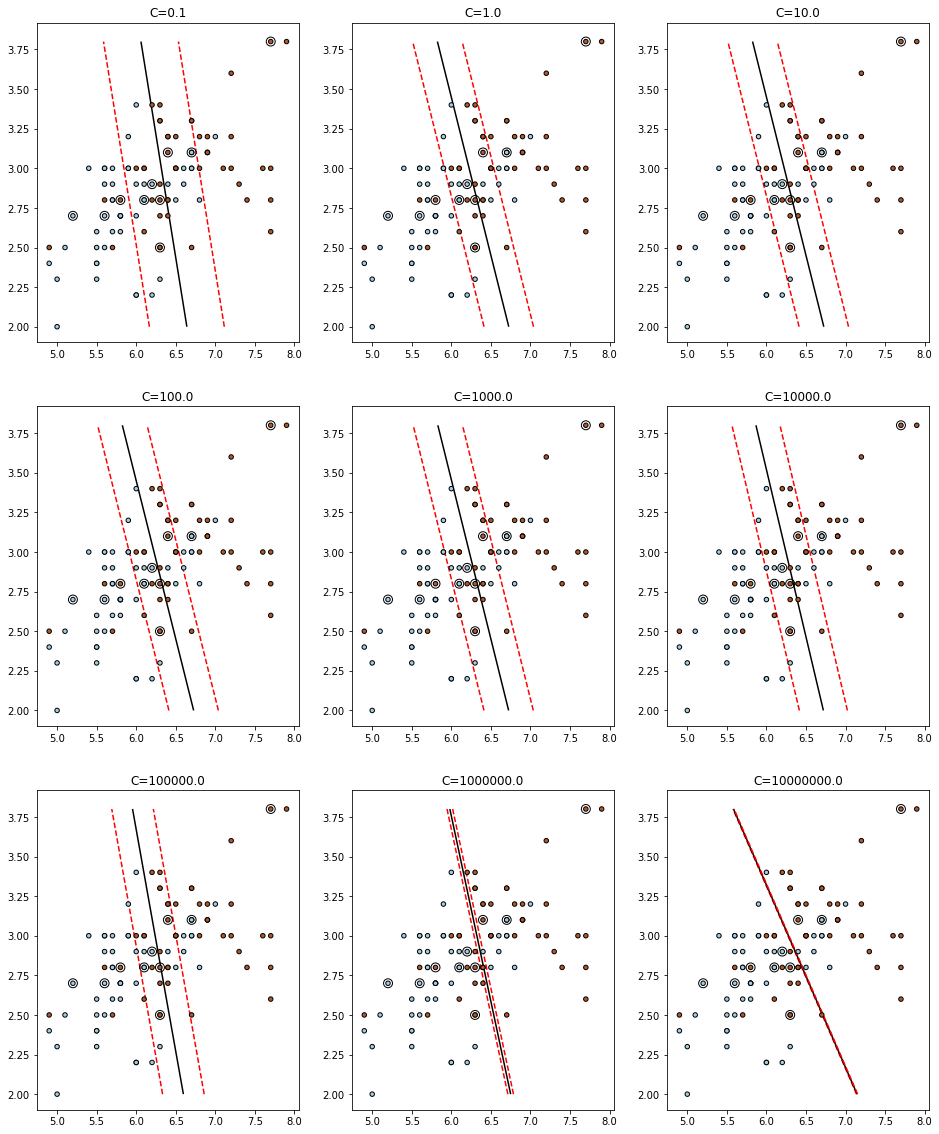

In [25]:

fig_index = 0
plt.figure(figsize=(16, 20))
for C in [0.1 * 10 ** i for i in range(9)]:
    plt.subplot(331+fig_index)
    fig_index += 1
    clf = svm.SVC(C=C, gamma='auto', kernel='linear')
    clf.fit(X_train, y_train)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    # plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['r', 'k', 'r'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title('C={}'.format(C))

# plt.title(kernel)